In [1]:
from google.colab import drive
drive.mount("/content/gdrive/", force_remount=True)

%cd '/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter11_Kmeans'

Mounted at /content/gdrive/
/content/gdrive/MyDrive/LDS6_S7CN_KieuTriDang/Demo/Chapter11_Kmeans


## Customer Segmentation

### Step 1: Business Understanding
Hiện tại khách hàng của cty chưa dc phân khúc cụ thể => cần phân khúc khách hàng => Cải thiện hiệu quả quảng bá => tăng doanh thu, cải thiện mức độ hài lòng

In [2]:
import pandas as pd
import numpy as np
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [3]:
# Hiển thị số thập phân thay cho science math number
np.set_printoptions(suppress=True)

## Step 2: Data Understanding / Acquire
Từ yêu cầu, lấy data từ máy chủ
Dữ liệu khacch1 hàng hiện có 1000 mẫu chứa thông tin income, age, gender

## Step 3: Data prepration / Prepare

<img src="https://drive.google.com/file/d/16fxIhSt-QEIRswmYxsEC1NJvkUWYAfee/view?usp=sharing"/>

Data consollidation: hợp nhất dữ liệu từ các nguồn, lữa chọn các dữ liệu phù hợp

In [4]:
data = pd.read_csv('ageinc_g.csv', index_col = 0)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   income  1000 non-null   int64 
 1   age     1000 non-null   int64 
 2   gender  1000 non-null   object
dtypes: int64(2), object(1)
memory usage: 31.2+ KB


In [6]:
data.head()

,income,age,gender
0,101743,58,Female
1,49597,27,Female
2,36517,52,Male
3,33223,49,Male
4,72994,53,Female


Data Cleaning: Kiểm tra xem có dữ  liệu không liên quan, dữ liệu null, dữ liệu outllier, hay không? Nếu có thì xử lý

In [7]:
# Kiểm tra dữ liệu null
print(data.isnull().sum())
# => Không có dữ liệu null

income    0
age       0
gender    0
dtype: int64


Phân tích đơn biến: trực quan hóa, kiểm tra dữ liệu outlier

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Ver

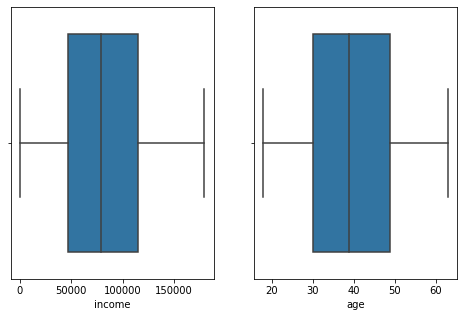

In [8]:
# Trực quan hóa dữ liệu cho từng biến liên tục
plt.figure(figsize = (8, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data.income, orient='v')
plt.subplot(1, 2, 2,)
sns.boxplot(data.age, orient='v')
plt.show()

=> Cả hai biến đều ko có outlier

Và Dataset có cột gender: là thuộc tính phân loại kiểu chuỗi => tạo cột phân loại kiểu số

In [9]:
data = pd.get_dummies(data, drop_first=True)

In [10]:
data.head()

,income,age,gender_Male
0,101743,58,0
1,49597,27,0
2,36517,52,1
3,33223,49,1
4,72994,53,0


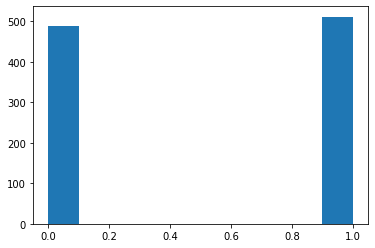

In [11]:
plt.hist(data.gender_Male)
plt.show()

* Customer Segmentation là một bài toán phân nhóm dựa trên sự tương tự về các thuộc tính và sẽ tính khoản cách để biết mẫu này "gần" mẫu kia hay không bằng công thức tính khoản cách Euclide
* Đối với các thuật toán cần tính khoản cách thì dữ liệu trên các cột phải đảm bảo tính công bằng khi tính toán. Tuy nhiên, quan sát thấy income và age có range dữ liệu khác biệt, chênh lệch nhiều => cần p hải chuẩn hóa dữ liệu.
* Muốn chuẩn hóa dữ liệu: cần kiểm tra phân phối dữ liệu

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


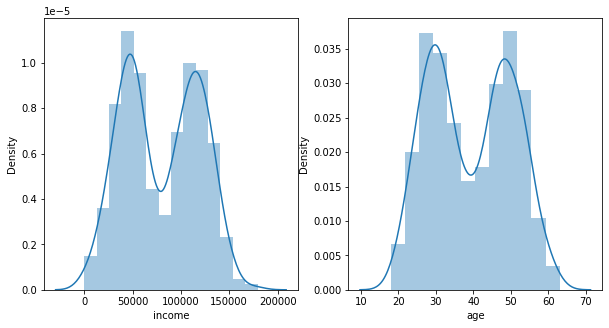

In [13]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.distplot(data.income)
plt.subplot(1, 2, 2)
sns.distplot(data.age)
plt.show()

In [14]:
data.skew()

income         0.028753
age            0.049110
gender_Male   -0.044077
dtype: float64

In [15]:
data.kurtosis()

income        -1.210079
age           -1.262649
gender_Male   -2.002065
dtype: float64

Dựa theo phân phối ta rút ra được các nhận xét:
1. Dữ liệu không theo phân phối Guaussian
1. Dữ liệu không có outlier
=> Dùng MinMaxScaler để chuẩn hóa

In [16]:
mmScaler = MinMaxScaler()
mmScaler.fit(data[['income', 'age']])
data_sub = mmScaler.transform(data[['income', 'age']])
data_sub

array([[0.56746461, 0.88888889],
       [0.27662387, 0.2       ],
       [0.20367107, 0.75555556],
       ...,
       [0.23538434, 0.37777778],
       [0.0946769 , 0.28888889],
       [0.69080393, 0.57777778]])

In [21]:
data_sub_min_max_scaler = pd.DataFrame(data_sub,
                                       columns=['mm_income', 'mm_age'])
data = pd.concat([data.reset_index(drop=True),
                  data_sub_min_max_scaler], axis = 1)

In [22]:
data.head()

,income,age,gender_Male,mm_income,mm_age
0,101743,58,0,0.567465,0.888889
1,49597,27,0,0.276624,0.200000
2,36517,52,1,0.203671,0.755556
3,33223,49,1,0.185299,0.688889
4,72994,53,0,0.407119,0.777778


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   income       1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   gender_Male  1000 non-null   uint8  
 3   mm_income    1000 non-null   float64
 4   mm_age       1000 non-null   float64
dtypes: float64(2), int64(2), uint8(1)
memory usage: 32.4 KB


Data reduction: lựa chọn các biến phù hợp => đưa vào huấn luyện
trong bài toán này: sẽ dùng inputs là: mm_nicome, mm_age [, gender_Male]

## Step 4: Modeling & Evaluation / Analyze 

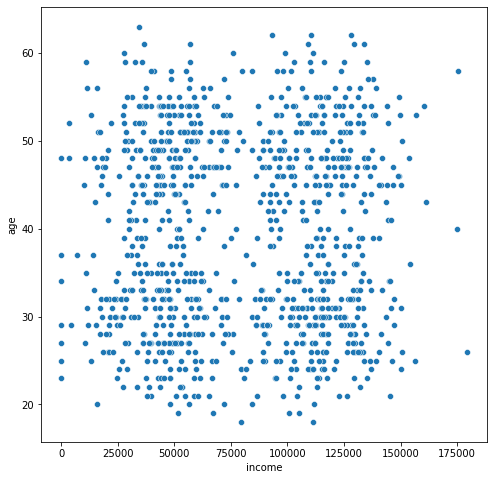

In [25]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data,
                x='income',
                y='age')
plt.show()

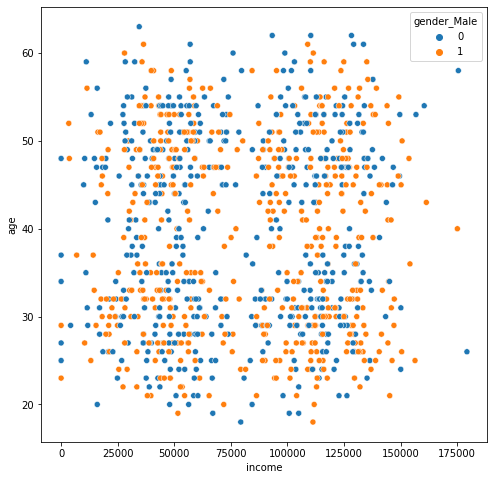

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data,
                x='income',
                y='age',
                hue='gender_Male')
plt.show()

In [30]:
data_male = data.where(data['gender_Male'] == 1, axis = 0).dropna()

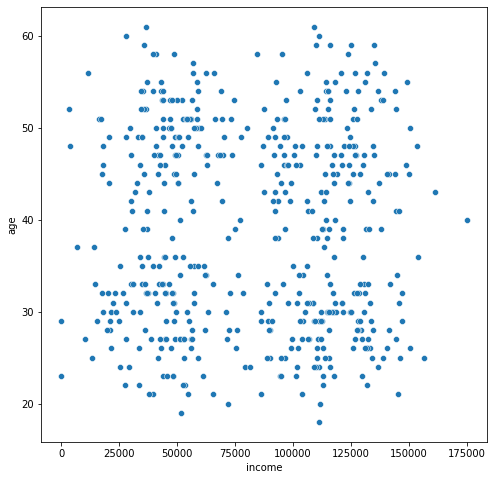

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=data_male,
                x='income',
                y='age',)
plt.show()

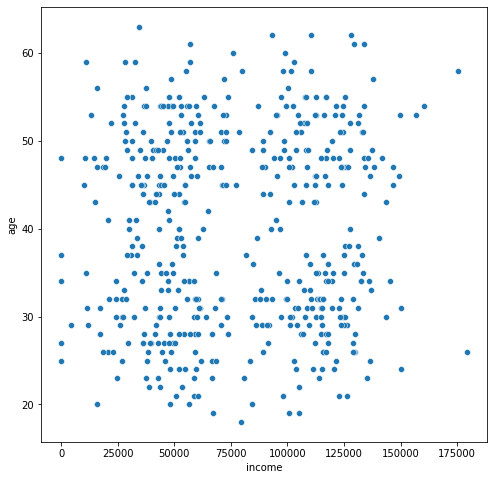

In [33]:
data_female = data.where(data['gender_Male'] == 0, axis = 0).dropna()
plt.figure(figsize=(8,8))
sns.scatterplot(data=data_female,
                x='income',
                y='age',)
plt.show()

### Phân cụm theo: mm_income, mm_age

Gợi ý cách chọn k

In [35]:
distortions = [] # dùng để chứa WSSE tương ứng
K = range(1, 8)
for k in K:
  kmeanModel = KMeans(n_clusters=k)
  kmeanModel.fit(data[['mm_income', 'mm_age']])

  distances_from_point_centroid = cdist(data[['mm_income', 'mm_age']], kmeanModel.cluster_centers_)
  nearest_point = np.min(distances_from_point_centroid, axis = 1)
  
  average = sum(nearest_point) / data[['mm_income', 'mm_age']].shape[0]

  distortions.append(average)

Gợi ý trực quan elbow

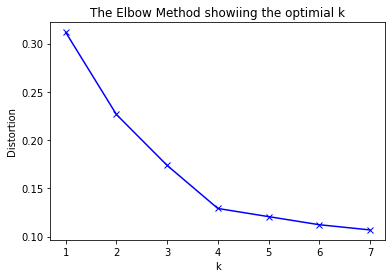

In [38]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showiing the optimial k')
plt.show()

Chọn k = 4 vì từ 4 trở đi lỗi giảm đi nhỏ và mịn

In [40]:
# Áp dụng k = 4
kmeans = KMeans(n_clusters=4)
kmeans.fit(data[['mm_income', 'mm_age']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print('Centroids in min-max scale: ')
print(centroids)
print('Centroids in normal')
normal_centroids = mmScaler.inverse_transform(centroids)
print(normal_centroids)
print(labels)

Centroids in min-max scale: 
[[0.64257984 0.26106804]
 [0.25925224 0.69644097]
 [0.64809667 0.6977591 ]
 [0.24372937 0.25833333]]
Centroids in normal
[[115210.70930233     29.74806202]
 [ 46482.37109375     49.33984375]
 [116199.84453782     49.39915966]
 [ 43699.21370968     29.625     ]]
[2 3 1 1 1 3 3 0 3 1 3 3 3 2 2 1 0 0 3 1 3 0 2 2 3 0 2 3 2 0 3 3 3 0 0 0 3
 3 1 2 1 1 2 0 0 0 2 2 0 3 0 1 2 3 1 3 3 3 0 3 2 1 0 0 3 0 1 0 2 0 1 0 0 2
 1 1 3 0 0 2 2 3 0 1 0 1 1 1 1 0 1 3 1 0 3 3 0 1 1 1 3 0 1 2 1 3 0 1 1 1 3
 2 2 3 0 1 2 0 3 1 2 3 0 3 1 3 0 3 3 2 0 3 1 0 2 1 0 3 2 3 1 3 1 0 3 1 2 0
 0 3 0 3 0 1 3 3 0 3 0 2 2 0 2 0 2 3 3 2 0 3 0 1 0 2 1 1 2 2 0 0 1 3 0 3 2
 0 0 2 2 0 0 1 3 3 3 3 2 0 2 1 2 1 1 3 1 2 2 1 1 1 1 1 2 2 1 3 0 3 2 1 0 0
 3 0 0 2 1 3 1 2 2 1 2 0 3 0 3 2 3 2 2 1 3 0 1 2 2 3 3 0 3 3 3 1 1 1 0 0 2
 0 0 3 2 0 3 2 2 3 0 1 1 0 3 2 2 2 3 3 2 2 2 0 3 2 0 2 1 3 1 3 3 1 2 0 3 0
 1 0 2 3 0 1 0 2 3 1 1 0 3 1 0 0 1 1 1 3 0 3 2 1 1 3 2 1 1 3 2 1 1 1 1 3 0
 0 1 3 3 3 2 2 3 0 0 1 1 3 2 3 1 3

## Report

In [44]:
data['Group'] = pd.Series(labels)
data.head()

,income,age,gender_Male,mm_income,mm_age,Group
0,101743,58,0,0.567465,0.888889,2
1,49597,27,0,0.276624,0.200000,3
2,36517,52,1,0.203671,0.755556,1
3,33223,49,1,0.185299,0.688889,1
4,72994,53,0,0.407119,0.777778,1


In [45]:
data.Group.value_counts()

0    258
1    256
3    248
2    238
Name: Group, dtype: int64

In [46]:
i = 0
for cluster in normal_centroids:
  print('*** Centroid Cluster: ', str(i))
  print('Income: ', round(cluster[0], 2))
  print('Age: ', round(cluster[1]), 2)
  i = i + 1

*** Centroid Cluster:  0
Income:  115210.71
Age:  30 2
*** Centroid Cluster:  1
Income:  46482.37
Age:  49 2
*** Centroid Cluster:  2
Income:  116199.84
Age:  49 2
*** Centroid Cluster:  3
Income:  43699.21
Age:  30 2


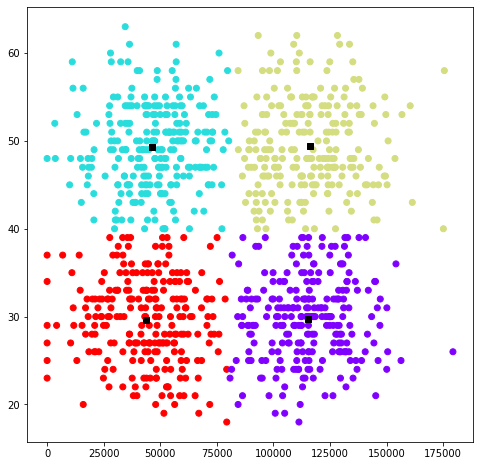

In [47]:
plt.figure(figsize=(8,8))
plt.scatter(data.income, data.age, c = data.Group, cmap='rainbow')
plt.scatter(normal_centroids[:, 0], normal_centroids[:, 1],
            marker = 's',
            c = 'black')
plt.show()